In [1]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


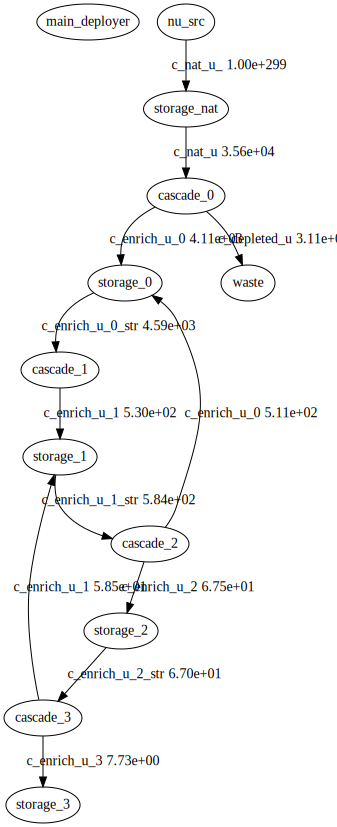

In [2]:
cyh.MakeFlowGraph("cascade_case_2_3.sqlite")



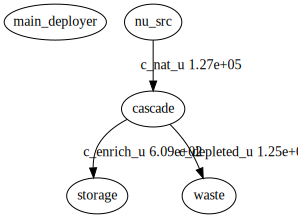

In [3]:
cyh.MakeFlowGraph("cascade_case_1.sqlite")

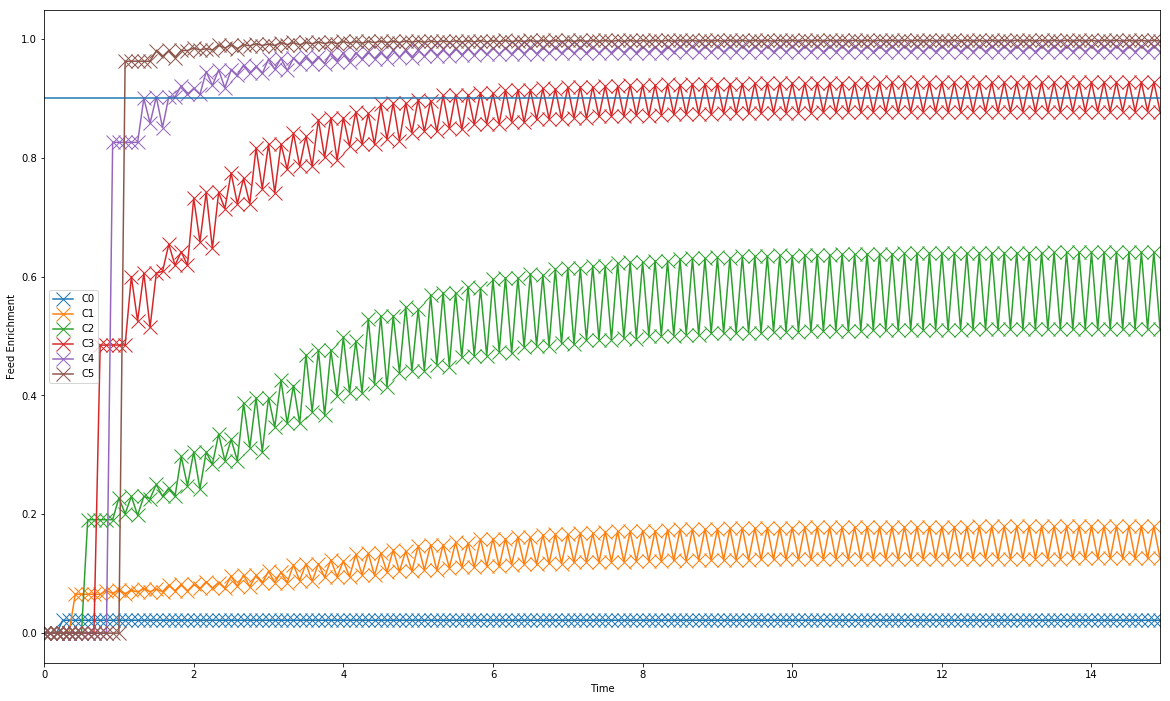

In [4]:
file = "cascade_case_2.sqlite"
sender = [['cascade_0'], 
             ['cascade_1'], 
             ['cascade_2'], 
             ['cascade_3'], 
             ['cascade_4'], 
             ['cascade_5']]
receivers = [['storage_0'], 
          ['storage_1'], 
          ['storage_2'], 
          ['storage_3'], 
          ['storage_4'],
            ['storage_5']]
nucs1 = ['238U']
nucs2 = ['235U']
uma_238u = 238050786.996e-6
uma_235u = 235043928.190e-6

c_names = ['C0',
           'C1',
           'C2',
           'C3',
           'C4',
           'C5']
labels = ['Cascade0',
          'Cascade0rec',
          'Cascade1',
          'Cascade2',
          'Cascade3',
          'Cascade4',
          'Cascade5']

feed_case_2 = [] 
plt_feed_case_2 = []
for i in range(6):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2.append(df_)
    plt_feed_case_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

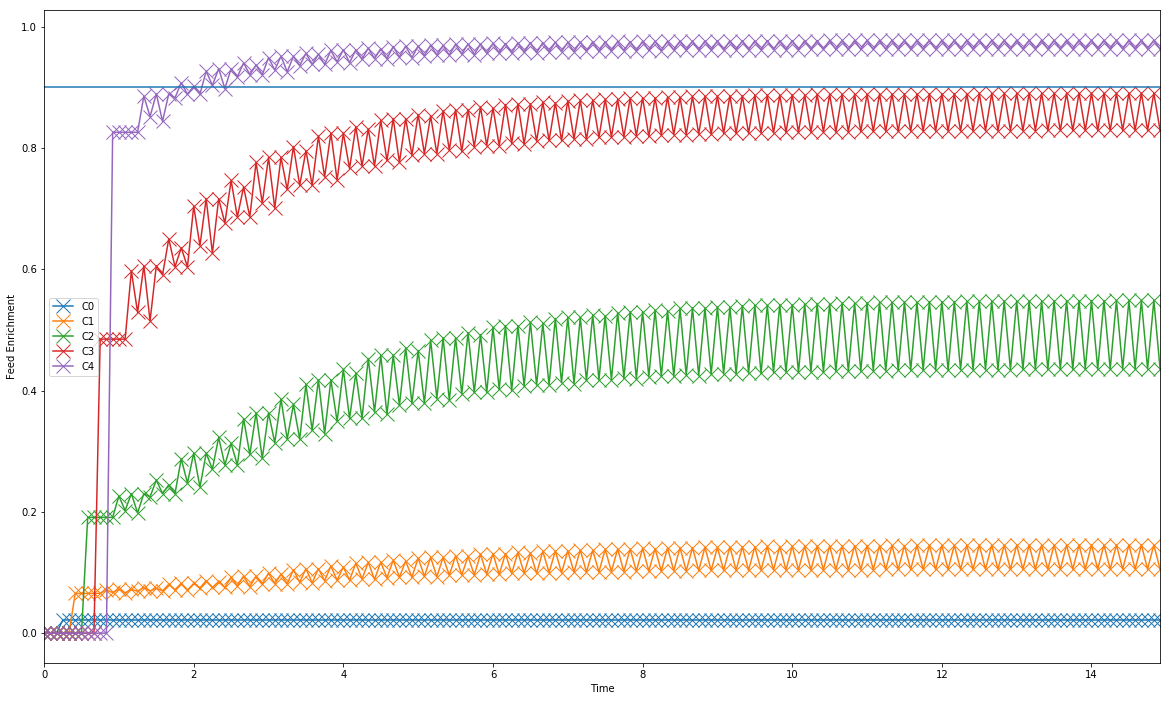

In [5]:
file = "cascade_case_2_2.sqlite"

feed_case_2_2 = [] 
plt_feed_case_2_2 = []
for i in range(5):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_2.append(df_)
    plt_feed_case_2_2.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_2, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

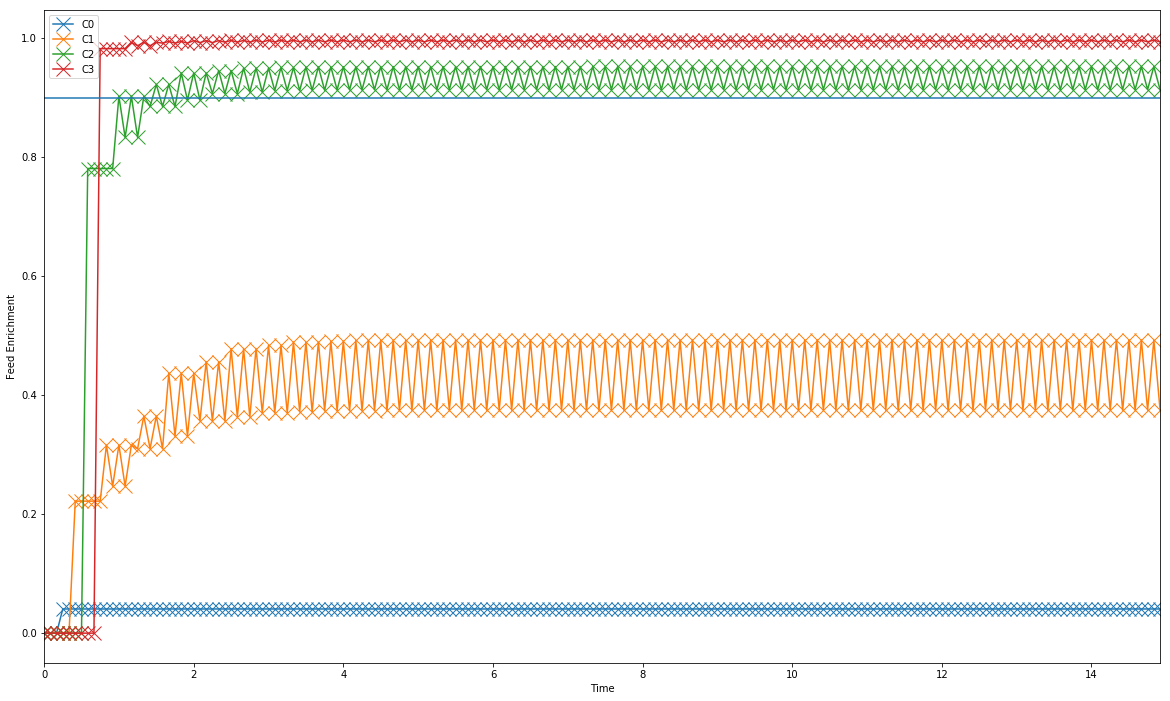

In [6]:
file = "cascade_case_2_3.sqlite"

feed_case_2_3 = [] 
plt_feed_case_2_3 = []
for i in range(4):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_3.append(df_)
    plt_feed_case_2_3.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_3, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

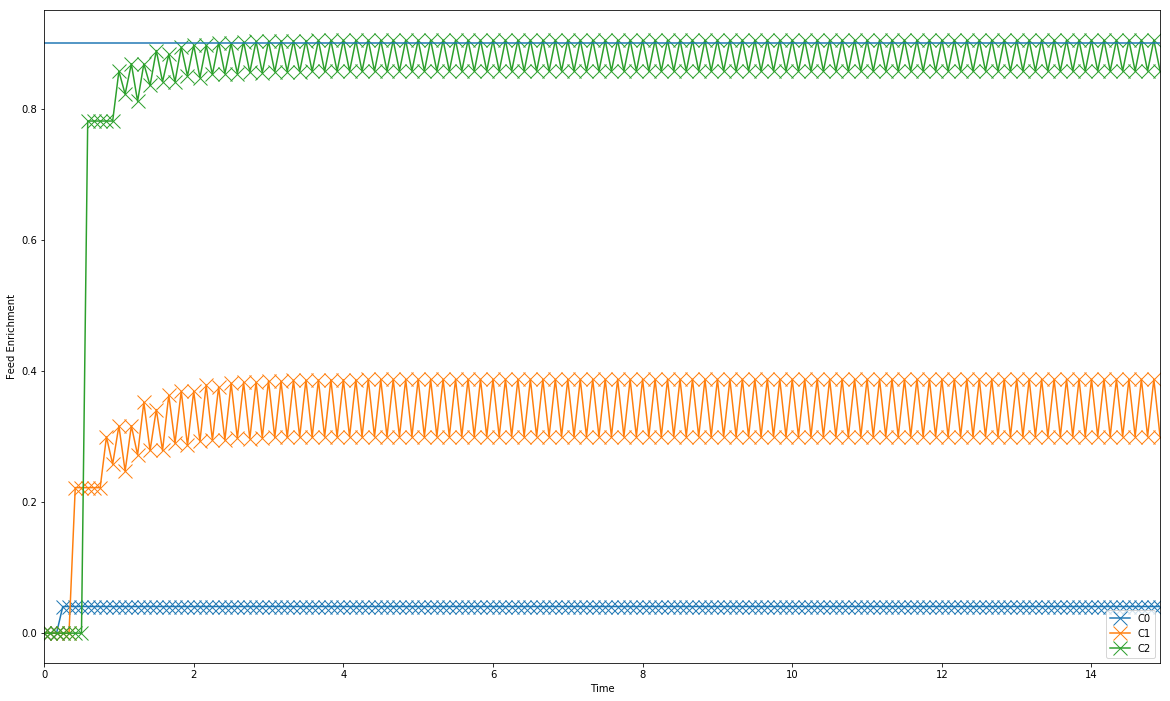

In [7]:
file = "cascade_case_2_4.sqlite"

feed_case_2_4 = [] 
plt_feed_case_2_4 = []
for i in range(3):
    df_ = cyh.TransFrac(file, receivers[i], sender[i], nucs1, nucs2,uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    feed_case_2_4.append(df_)
    plt_feed_case_2_4.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_feed_case_2_4, "Time", "Feed Enrichment" )
plt.axhline(y=0.9)

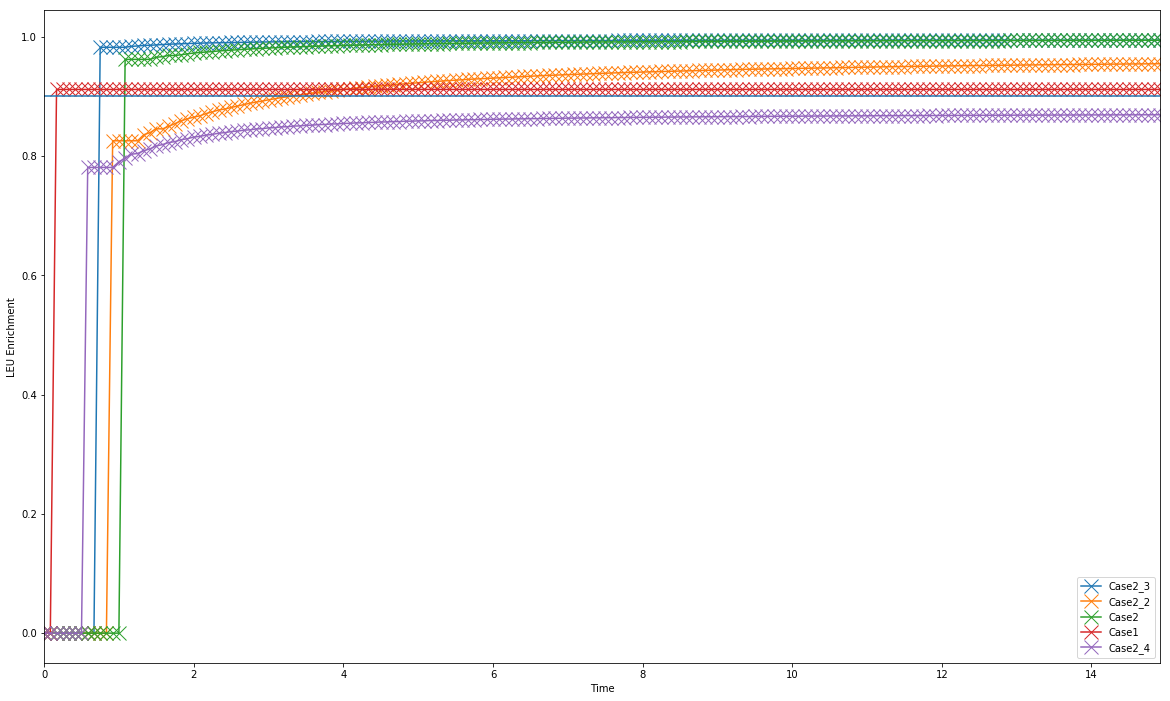

In [8]:
files = ['cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite','cascade_case_2_4.sqlite']
invs = ['storage_3', 'storage_4', 'storage_5', 'storage','storage_2']

c_names = ['Case2_3','Case2_2', 'Case2', 'Case1','Case2_4']
LEU_enrich_case_2_x = []
plt_LEU_enrich_case_2_x = []

for i in range(5):
    df_ = cyh.InvFrac(files[i], [invs[i]], nucs1, nucs2, uma_238u, uma_235u)
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_enrich_case_2_x.append(df_)
    plt_LEU_enrich_case_2_x.append( (df_, c_names[i]) )
    
pdh.MakePlot(plt_LEU_enrich_case_2_x, "Time", "LEU Enrichment" )
plt.axhline(y=0.9)

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


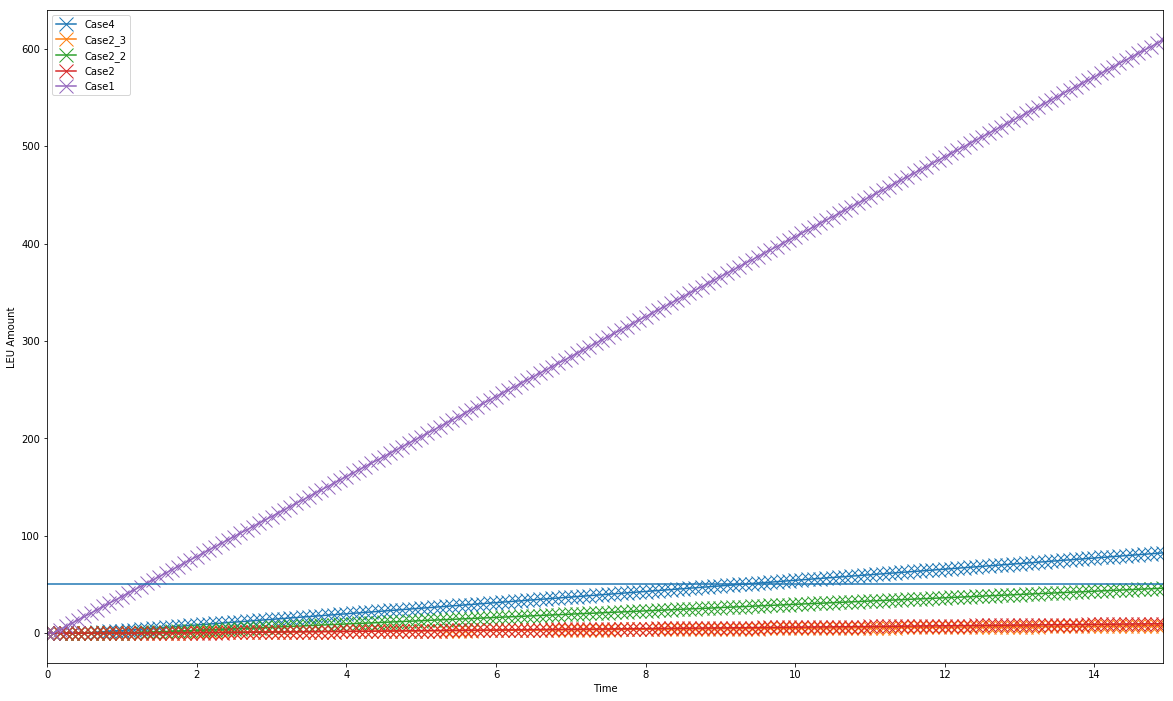

In [9]:
files = ['cascade_case_2_4.sqlite','cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite']
invs = ['storage_2','storage_3', 'storage_4', 'storage_5', 'storage']

c_names = ['Case4','Case2_3','Case2_2', 'Case2', 'Case1']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "LEU Amount" )
plt.axhline(y=50)

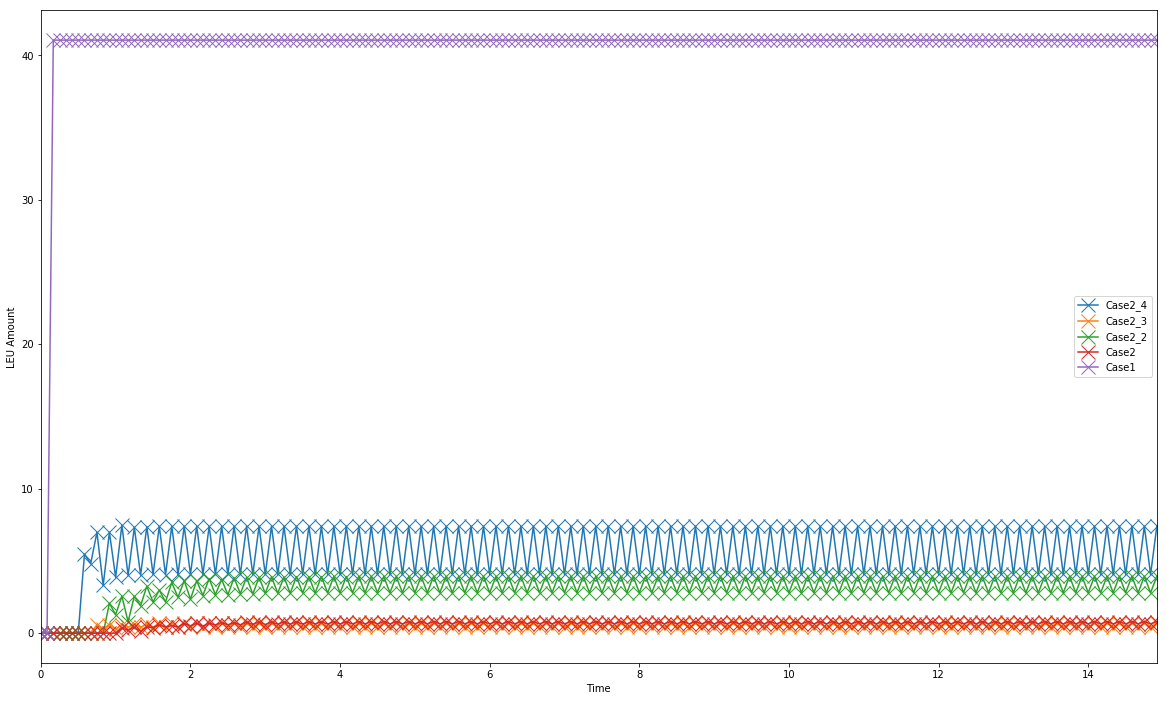

In [10]:
files = ['cascade_case_2_4.sqlite','cascade_case_2_3.sqlite','cascade_case_2_2.sqlite', 'cascade_case_2.sqlite', 'cascade_case_1.sqlite']
invs = ['storage_2','storage_3', 'storage_4', 'storage_5', 'storage']

c_names = ['Case2_4','Case2_3','Case2_2', 'Case2', 'Case1']
LEU_prod_qty_case_2_x = []
plt_LEU_prod_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.transactions(ev_, receivers=[invs[i]])
    df_['Mass'] *= 12.

    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.


    LEU_prod_qty_case_2_x.append(df_)
    plt_LEU_prod_qty_case_2_x.append( (LEU_prod_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_prod_qty_case_2_x, "Time", "LEU Amount" )


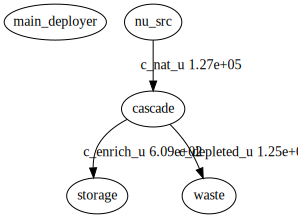

In [11]:
cyh.MakeFlowGraph("cascade_case_1.sqlite")


In [12]:
c_enrich_u 6.09e+02


SyntaxError: invalid syntax (<ipython-input-12-9655348aac87>, line 1)